In [1]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [3]:
var_dict = dict(
    numerical_vars = ['Length', 'Diameter', 'Height' ,'Whole_weight', 
                      'Shucked_weight', 'Viscera_weight', 'Shell_weight'],
    categorical_vars = ['Sex'],
    class_var = 'class'
)

In [4]:
exp = Experiment('data/abalone.csv', 
                 var_dict,
                 embedding_dim=8,
                 lr=1e-2,
                 batch_size=1024,
                 n_epoch=30,
                 verbose=True,
                 n_bins_range=range(2, 21),
                 n_init_bins_list=[10,15,20])

In [5]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=8, batch_size=1024, 
                     n_epoch=30, lr=1e-2, weight_decay=0.0, verbose=True)
sb.fit(exp.data, n_init_bins=15)

>>> Epoch = 1, Loss = 0.24906887114048004
[13, 8, 6, 14, 12, 9, 13]
>>> Epoch = 2, Loss = 0.2216593474149704
[11, 7, 9, 5, 10, 9, 10]
>>> Epoch = 3, Loss = 0.19684027135372162
[12, 7, 7, 3, 10, 10, 10]
>>> Epoch = 4, Loss = 0.18129456043243408
[9, 3, 3, 4, 10, 8, 5]
>>> Epoch = 5, Loss = 0.172393336892128
[6, 3, 3, 4, 4, 4, 3]
>>> Epoch = 6, Loss = 0.1686573624610901
[2, 3, 2, 4, 4, 3, 3]
0 5
>>> Epoch = 7, Loss = 0.17209185659885406
[3, 3, 2, 4, 4, 3, 7]
0 5
>>> Epoch = 8, Loss = 0.17312899231910706
[2, 3, 2, 7, 4, 3, 7]
0 5
>>> Epoch = 9, Loss = 0.15998752415180206
[3, 4, 2, 7, 4, 3, 6]
0 5
>>> Epoch = 10, Loss = 0.16817550361156464
[3, 4, 2, 5, 4, 3, 6]
0 5
>>> Epoch = 11, Loss = 0.16945461928844452
[3, 3, 2, 7, 4, 3, 6]
0 5
>>> Epoch = 12, Loss = 0.16239094734191895
[3, 4, 2, 5, 4, 3, 5]
0 5
>>> Epoch = 13, Loss = 0.17150574922561646
[3, 4, 2, 5, 4, 3, 4]
0 5
>>> Epoch = 14, Loss = 0.16269034147262573
[3, 4, 2, 5, 4, 3, 4]
1 5
>>> Epoch = 15, Loss = 0.16117198765277863
[3, 5, 2, 5,

In [14]:
%time clustering_scores = exp.test_clustering_performance()

>>> Epoch = 1, Loss = 0.3131818473339081
[7, 5, 6, 9, 5, 9, 8]
>>> Epoch = 2, Loss = 0.27025526762008667
[5, 4, 6, 5, 3, 3, 8]
>>> Epoch = 3, Loss = 0.23280073702335358
[5, 4, 6, 5, 3, 3, 4]
>>> Epoch = 4, Loss = 0.22403006255626678
[5, 3, 6, 5, 3, 4, 4]
>>> Epoch = 5, Loss = 0.21590223908424377
[4, 4, 6, 4, 4, 3, 4]
>>> Epoch = 6, Loss = 0.21297064423561096
[4, 4, 3, 4, 4, 3, 4]
0 5
>>> Epoch = 7, Loss = 0.21574699878692627
[5, 4, 3, 4, 5, 3, 4]
0 5
>>> Epoch = 8, Loss = 0.2134358137845993
[4, 4, 3, 4, 5, 3, 6]
0 5
>>> Epoch = 9, Loss = 0.21394504606723785
[5, 4, 3, 4, 2, 4, 6]
0 5
>>> Epoch = 10, Loss = 0.2088739424943924
[4, 4, 3, 4, 2, 5, 6]
0 5
>>> Epoch = 11, Loss = 0.21005138754844666
[5, 4, 3, 4, 2, 5, 2]
0 5
>>> Epoch = 12, Loss = 0.21185992658138275
[5, 4, 3, 4, 2, 5, 2]
1 5
>>> Epoch = 13, Loss = 0.2101929634809494
[2, 4, 3, 4, 2, 5, 2]
0 5
>>> Epoch = 14, Loss = 0.21283173561096191
[2, 4, 2, 4, 2, 5, 2]
0 5
>>> Epoch = 15, Loss = 0.2089662104845047
[2, 4, 2, 4, 2, 5, 2]
1 5

In [15]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

kmeans, #Cols = 10, NMI = 0.1607
agglomerative, #Cols = 10, NMI = 0.1591


In [16]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

kmeans, #Cols = 10, NMI = 0.1752
agglomerative, #Cols = 10, NMI = 0.1678


In [17]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

kmeans
#Bins = 2, #Cols = 17, #NMI = 0.1611
#Bins = 3, #Cols = 24, #NMI = 0.1609
#Bins = 4, #Cols = 31, #NMI = 0.1750
#Bins = 5, #Cols = 38, #NMI = 0.1665
#Bins = 6, #Cols = 45, #NMI = 0.1572
#Bins = 7, #Cols = 52, #NMI = 0.1677
#Bins = 8, #Cols = 59, #NMI = 0.1630
#Bins = 9, #Cols = 66, #NMI = 0.1700
#Bins = 10, #Cols = 73, #NMI = 0.1660
#Bins = 11, #Cols = 80, #NMI = 0.1653
#Bins = 12, #Cols = 87, #NMI = 0.1683
#Bins = 13, #Cols = 94, #NMI = 0.1673
#Bins = 14, #Cols = 101, #NMI = 0.1620
#Bins = 15, #Cols = 108, #NMI = 0.1637
#Bins = 16, #Cols = 115, #NMI = 0.1548
#Bins = 17, #Cols = 122, #NMI = 0.1703
#Bins = 18, #Cols = 129, #NMI = 0.1672
#Bins = 19, #Cols = 136, #NMI = 0.1603
#Bins = 20, #Cols = 143, #NMI = 0.1582
agglomerative
#Bins = 2, #Cols = 17, #NMI = 0.1612
#Bins = 3, #Cols = 24, #NMI = 0.1634
#Bins = 4, #Cols = 31, #NMI = 0.1731
#Bins = 5, #Cols = 38, #NMI = 0.1688
#Bins = 6, #Cols = 45, #NMI = 0.1718
#Bins = 7, #Cols = 52, #NMI = 0.1712
#Bins = 8, #Cols = 59, #NMI = 0.1628

In [18]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

kmeans
#Bins = 2, #Cols = 17, #NMI = 0.1469
#Bins = 3, #Cols = 24, #NMI = 0.1553
#Bins = 4, #Cols = 31, #NMI = 0.1558
#Bins = 5, #Cols = 38, #NMI = 0.1590
#Bins = 6, #Cols = 45, #NMI = 0.1566
#Bins = 7, #Cols = 52, #NMI = 0.1634
#Bins = 8, #Cols = 59, #NMI = 0.1631
#Bins = 9, #Cols = 66, #NMI = 0.1544
#Bins = 10, #Cols = 73, #NMI = 0.1542
#Bins = 11, #Cols = 80, #NMI = 0.1529
#Bins = 12, #Cols = 87, #NMI = 0.1534
#Bins = 13, #Cols = 94, #NMI = 0.1580
#Bins = 14, #Cols = 101, #NMI = 0.1545
#Bins = 15, #Cols = 108, #NMI = 0.1573
#Bins = 16, #Cols = 115, #NMI = 0.1559
#Bins = 17, #Cols = 122, #NMI = 0.1505
#Bins = 18, #Cols = 128, #NMI = 0.1537
#Bins = 19, #Cols = 136, #NMI = 0.1506
#Bins = 20, #Cols = 142, #NMI = 0.1533
agglomerative
#Bins = 2, #Cols = 17, #NMI = 0.1469
#Bins = 3, #Cols = 24, #NMI = 0.1579
#Bins = 4, #Cols = 31, #NMI = 0.1568
#Bins = 5, #Cols = 38, #NMI = 0.1621
#Bins = 6, #Cols = 45, #NMI = 0.1615
#Bins = 7, #Cols = 52, #NMI = 0.1710
#Bins = 8, #Cols = 59, #NMI = 0.1572

In [19]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

kmeans
#Init Bins = 10, #Cols = 22, NMI = 0.1546
#Init Bins = 15, #Cols = 24, NMI = 0.1762
#Init Bins = 20, #Cols = 23, NMI = 0.1590
agglomerative
#Init Bins = 10, #Cols = 22, NMI = 0.1515
#Init Bins = 15, #Cols = 24, NMI = 0.1738
#Init Bins = 20, #Cols = 23, NMI = 0.1582


In [20]:
%time clf_scores = exp.test_classification_performance(cv=3)

>>> Epoch = 1, Loss = 0.3172871768474579
[9, 8, 9, 5, 2, 9, 6]
0 5
>>> Epoch = 2, Loss = 0.2736731171607971
[6, 6, 6, 6, 8, 9, 6]
0 5
>>> Epoch = 3, Loss = 0.232356458902359
[6, 3, 2, 5, 2, 3, 2]
0 5
>>> Epoch = 4, Loss = 0.22037234902381897
[4, 3, 2, 3, 2, 3, 4]
0 5
>>> Epoch = 5, Loss = 0.22980205714702606
[3, 3, 2, 3, 3, 3, 4]
0 5
>>> Epoch = 6, Loss = 0.21853451430797577
[3, 3, 2, 3, 2, 2, 4]
0 5
>>> Epoch = 7, Loss = 0.2151804268360138
[3, 4, 2, 3, 3, 2, 3]
0 5
>>> Epoch = 8, Loss = 0.21216537058353424
[3, 4, 2, 3, 2, 3, 3]
0 5
>>> Epoch = 9, Loss = 0.21232640743255615
[3, 4, 2, 3, 3, 3, 3]
0 5
>>> Epoch = 10, Loss = 0.21121296286582947
[3, 4, 2, 3, 3, 3, 3]
1 5
>>> Epoch = 11, Loss = 0.20266270637512207
[4, 4, 2, 3, 3, 2, 3]
0 5
>>> Epoch = 12, Loss = 0.20756478607654572
[2, 4, 2, 3, 2, 2, 3]
0 5
>>> Epoch = 13, Loss = 0.21133127808570862
[2, 4, 2, 3, 2, 2, 3]
1 5
>>> Epoch = 14, Loss = 0.2015574425458908
[2, 4, 2, 3, 2, 2, 3]
2 5
>>> Epoch = 15, Loss = 0.1935211420059204
[2, 4, 

>>> Epoch = 28, Loss = 0.20427818596363068
[2, 3, 2, 2, 2, 2, 3]
1 5
>>> Epoch = 29, Loss = 0.21468600630760193
[2, 3, 4, 2, 2, 2, 3]
1 5
>>> Epoch = 30, Loss = 0.20478403568267822
[2, 3, 2, 2, 2, 2, 3]
2 5
3 5
Embedding Failed to Converge in given #epochs..
>>> Epoch = 1, Loss = 0.25227898359298706
[10, 7, 12, 5, 5, 10, 7]
0 5
>>> Epoch = 2, Loss = 0.22107788920402527
[4, 13, 12, 5, 5, 12, 11]
0 5
>>> Epoch = 3, Loss = 0.20153315365314484
[4, 12, 12, 5, 6, 4, 10]
0 5
>>> Epoch = 4, Loss = 0.17938688397407532
[2, 10, 11, 6, 6, 2, 11]
0 5
>>> Epoch = 5, Loss = 0.17320667207241058
[2, 5, 9, 5, 2, 2, 8]
0 5
>>> Epoch = 6, Loss = 0.16435293853282928
[2, 3, 4, 5, 2, 2, 6]
0 5
>>> Epoch = 7, Loss = 0.16499879956245422
[2, 3, 7, 5, 2, 2, 6]
0 5
>>> Epoch = 8, Loss = 0.15827395021915436
[2, 3, 4, 5, 2, 2, 3]
0 5
>>> Epoch = 9, Loss = 0.16732515394687653
[2, 3, 4, 5, 2, 2, 3]
1 5
>>> Epoch = 10, Loss = 0.1647968888282776
[2, 2, 4, 5, 2, 2, 3]
0 5
>>> Epoch = 11, Loss = 0.16804362833499908
[2, 2

[5, 2, 6, 4, 6, 4, 5]
0 5
>>> Epoch = 11, Loss = 0.13824573159217834
[5, 2, 3, 4, 6, 4, 4]
0 5
>>> Epoch = 12, Loss = 0.13592733442783356
[3, 2, 3, 4, 6, 4, 5]
0 5
>>> Epoch = 13, Loss = 0.13974754512310028
[3, 2, 3, 4, 6, 4, 6]
0 5
>>> Epoch = 14, Loss = 0.14173440635204315
[3, 2, 2, 4, 6, 4, 6]
0 5
>>> Epoch = 15, Loss = 0.1378384232521057
[3, 2, 2, 4, 7, 4, 4]
0 5
>>> Epoch = 16, Loss = 0.14039266109466553
[3, 2, 2, 4, 6, 4, 5]
0 5
>>> Epoch = 17, Loss = 0.1381102055311203
[3, 2, 2, 4, 7, 6, 5]
0 5
>>> Epoch = 18, Loss = 0.13736142218112946
[3, 2, 2, 4, 6, 6, 5]
0 5
>>> Epoch = 19, Loss = 0.13963371515274048
[3, 2, 3, 4, 7, 6, 5]
0 5
>>> Epoch = 20, Loss = 0.13522133231163025
[3, 2, 2, 4, 6, 6, 5]
1 5
>>> Epoch = 21, Loss = 0.1351824700832367
[3, 2, 2, 4, 7, 6, 5]
1 5
>>> Epoch = 22, Loss = 0.13717757165431976
[3, 2, 3, 4, 7, 6, 5]
1 5
>>> Epoch = 23, Loss = 0.12904883921146393
[3, 2, 3, 4, 4, 6, 5]
0 5
>>> Epoch = 24, Loss = 0.13327747583389282
[3, 2, 3, 4, 4, 6, 5]
1 5
>>> Epoch =

In [21]:
exp.print_classification_scores(clf_scores, method='dummy_only')

DT performance
#cols = 10.0, Accuracy = 0.243 (+/- 0.010)
LR performance
#cols = 10.0, Accuracy = 0.252 (+/- 0.014)


In [22]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

DT performance
#cols = 10.0, Accuracy = 0.243 (+/- 0.011)
LR performance
#cols = 10.0, Accuracy = 0.258 (+/- 0.012)


In [23]:
exp.print_classification_scores(clf_scores, method='equal_width')

DT performance
#Bins = 2, #Avg Cols = 17.0, Accuracy = 0.235 (+/- 0.010)
#Bins = 3, #Avg Cols = 24.0, Accuracy = 0.230 (+/- 0.011)
#Bins = 4, #Avg Cols = 31.0, Accuracy = 0.241 (+/- 0.019)
#Bins = 5, #Avg Cols = 38.0, Accuracy = 0.242 (+/- 0.012)
#Bins = 6, #Avg Cols = 45.0, Accuracy = 0.254 (+/- 0.032)
#Bins = 7, #Avg Cols = 52.0, Accuracy = 0.256 (+/- 0.012)
#Bins = 8, #Avg Cols = 59.0, Accuracy = 0.256 (+/- 0.016)
#Bins = 9, #Avg Cols = 66.0, Accuracy = 0.240 (+/- 0.022)
#Bins = 10, #Avg Cols = 73.0, Accuracy = 0.258 (+/- 0.011)
#Bins = 11, #Avg Cols = 80.0, Accuracy = 0.249 (+/- 0.016)
#Bins = 12, #Avg Cols = 87.0, Accuracy = 0.252 (+/- 0.020)
#Bins = 13, #Avg Cols = 94.0, Accuracy = 0.251 (+/- 0.009)
#Bins = 14, #Avg Cols = 101.0, Accuracy = 0.248 (+/- 0.031)
#Bins = 15, #Avg Cols = 108.0, Accuracy = 0.240 (+/- 0.016)
#Bins = 16, #Avg Cols = 115.0, Accuracy = 0.238 (+/- 0.026)
#Bins = 17, #Avg Cols = 122.0, Accuracy = 0.256 (+/- 0.006)
#Bins = 18, #Avg Cols = 129.0, Accuracy = 0.2

In [24]:
exp.print_classification_scores(clf_scores, method='equal_freq')

DT performance
#Bins = 2, #Avg Cols = 17.0, Accuracy = 0.213 (+/- 0.007)
#Bins = 3, #Avg Cols = 24.0, Accuracy = 0.232 (+/- 0.020)
#Bins = 4, #Avg Cols = 31.0, Accuracy = 0.244 (+/- 0.013)
#Bins = 5, #Avg Cols = 38.0, Accuracy = 0.243 (+/- 0.011)
#Bins = 6, #Avg Cols = 45.0, Accuracy = 0.237 (+/- 0.013)
#Bins = 7, #Avg Cols = 52.0, Accuracy = 0.238 (+/- 0.012)
#Bins = 8, #Avg Cols = 59.0, Accuracy = 0.238 (+/- 0.014)
#Bins = 9, #Avg Cols = 66.0, Accuracy = 0.242 (+/- 0.022)
#Bins = 10, #Avg Cols = 73.0, Accuracy = 0.251 (+/- 0.027)
#Bins = 11, #Avg Cols = 80.0, Accuracy = 0.247 (+/- 0.031)
#Bins = 12, #Avg Cols = 87.0, Accuracy = 0.249 (+/- 0.017)
#Bins = 13, #Avg Cols = 94.0, Accuracy = 0.237 (+/- 0.017)
#Bins = 14, #Avg Cols = 101.0, Accuracy = 0.237 (+/- 0.024)
#Bins = 15, #Avg Cols = 108.0, Accuracy = 0.233 (+/- 0.010)
#Bins = 16, #Avg Cols = 115.0, Accuracy = 0.238 (+/- 0.030)
#Bins = 17, #Avg Cols = 122.0, Accuracy = 0.243 (+/- 0.033)
#Bins = 18, #Avg Cols = 128.66666666666666, A

In [25]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

DT performance
#Init Bins = 10, #Avg Cols = 20.666666666666668, Accuracy = 0.240 (+/- 0.022)
#Init Bins = 15, #Avg Cols = 24.666666666666668, Accuracy = 0.248 (+/- 0.019)
#Init Bins = 20, #Avg Cols = 24.666666666666668, Accuracy = 0.242 (+/- 0.024)
LR performance
#Init Bins = 10, #Avg Cols = 20.666666666666668, Accuracy = 0.243 (+/- 0.019)
#Init Bins = 15, #Avg Cols = 24.666666666666668, Accuracy = 0.250 (+/- 0.025)
#Init Bins = 20, #Avg Cols = 24.666666666666668, Accuracy = 0.237 (+/- 0.022)
NB performance
#Init Bins = 10, #Avg Cols = 20.666666666666668, Accuracy = 0.212 (+/- 0.019)
#Init Bins = 15, #Avg Cols = 24.666666666666668, Accuracy = 0.217 (+/- 0.022)
#Init Bins = 20, #Avg Cols = 24.666666666666668, Accuracy = 0.216 (+/- 0.032)


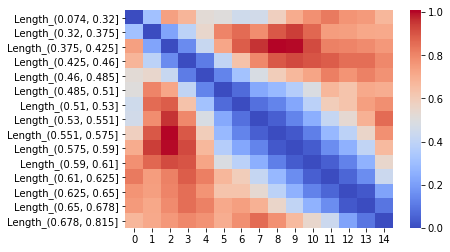

In [6]:
sb.plot_pairwise_distance_between_bins('Length')

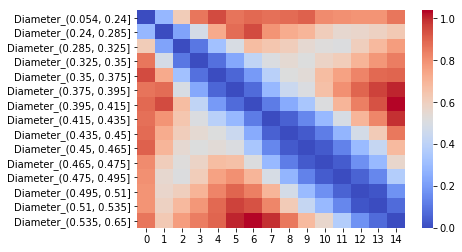

In [7]:
sb.plot_pairwise_distance_between_bins('Diameter')

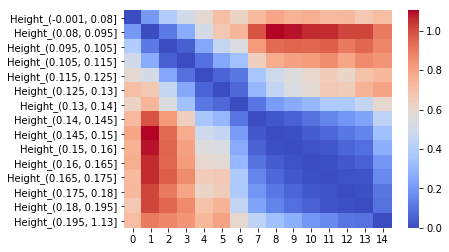

In [8]:
sb.plot_pairwise_distance_between_bins('Height')

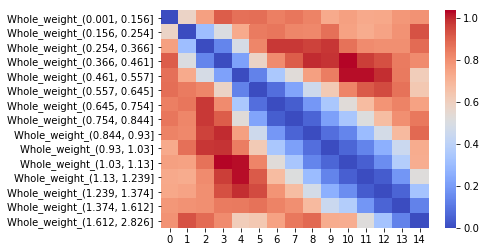

In [9]:
sb.plot_pairwise_distance_between_bins('Whole_weight')

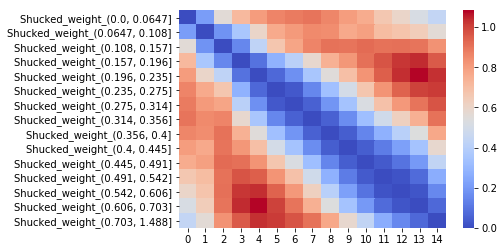

In [10]:
sb.plot_pairwise_distance_between_bins('Shucked_weight')

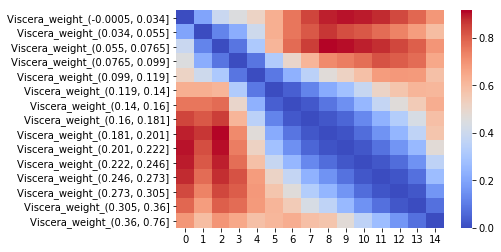

In [11]:
sb.plot_pairwise_distance_between_bins('Viscera_weight')

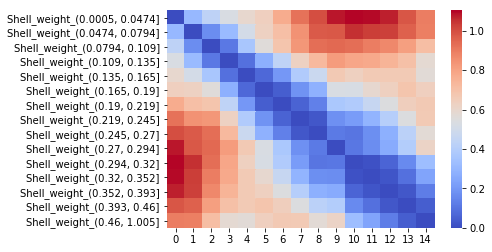

In [12]:
sb.plot_pairwise_distance_between_bins('Shell_weight')

In [13]:
for var, bins in sb.bins_by_var.items():
    print(var)
    print(bins['bins'])

Length
['(0.074, 0.485]', '(0.485, 0.59]', '(0.59, 0.815]']
Diameter
['(0.054, 0.325]', '(0.325, 0.415]', '(0.415, 0.475]', '(0.475, 0.65]']
Height
['(-0.001, 0.13]', '(0.13, 1.13]']
Whole_weight
['(0.001, 0.557]', '(0.557, 0.93]', '(0.93, 2.826]']
Shucked_weight
['(0.0, 0.157]', '(0.157, 0.356]', '(0.356, 1.488]']
Viscera_weight
['(-0.0005, 0.119]', '(0.119, 0.76]']
Shell_weight
['(0.0005, 0.19]', '(0.19, 1.005]']
